In [1]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [2]:
control = '/lmh_data/data/sclab/sclab/tmp/PDGFRA/exp.log'
MSE = '/lmh_data/data/sclab/sclab/tmp/PDGFRA_old/exp.log'

In [3]:
def read_train_info(_path):
    with open(_path, 'r') as f:
        _datas = f.readlines()
    _loss, _acc = [], []
    for i in range(3, len(_datas), 2):
        _data = _datas[i].split()
        train_loss, test_loss, test_acc = float(_data[-5]), float(_data[-3]), float(_data[-1])
        _loss.append(test_loss)
        _acc.append(test_acc)
    return gaussian_filter1d(_loss, sigma=6), gaussian_filter1d(_acc, sigma=6)

control_loss, control_acc = read_train_info(control)
MSE_loss, MSE_acc = read_train_info(MSE)

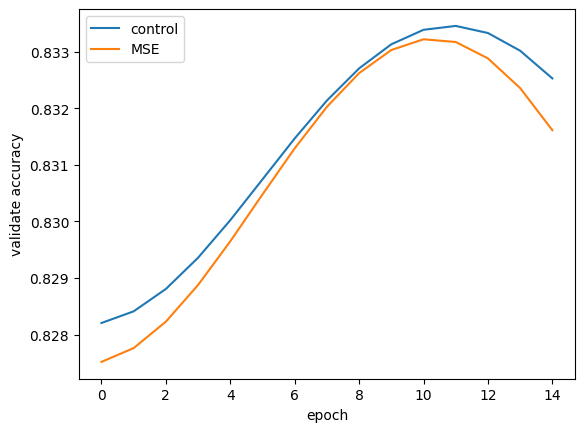

In [4]:
length = 15
x = [i for i in range(length)]
plt.plot(x, control_acc[:length], label='control')
plt.plot(x, MSE_acc[:length], label='MSE')

plt.xlabel('epoch')
plt.ylabel('validate accuracy')
plt.legend()
# plt.savefig('figure_file/ablation(all).pdf', format='pdf', bbox_inches='tight')
plt.show()